<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Project**

# Importing Libraries

In [38]:
#import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading Dataset

In [39]:
# Load the data

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("/content/pima-indians-diabetes.data.csv", names=names)
print(data.shape)

(768, 9)


# EDA

In [40]:
# Data Types for Each Attribute
data.dtypes


,0
preg,int64
plas,int64
pres,int64
skin,int64
test,int64
mass,float64
pedi,float64
age,int64
class,int64


In [41]:
#pd.set_option('display.precision', 3)

data.describe()


,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [42]:
# Pairwise Pearson correlations
data.corr()

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

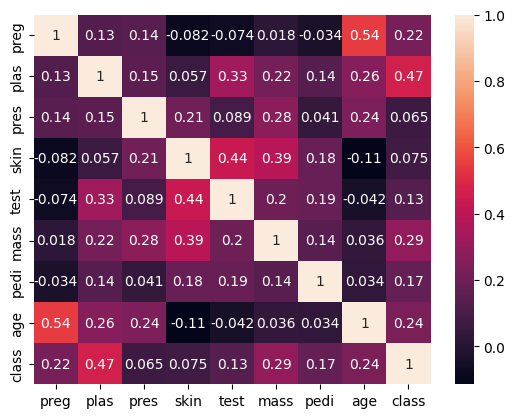

In [43]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [44]:
# Class proportion
data["class"].value_counts()

,count
class,
0,500
1,268


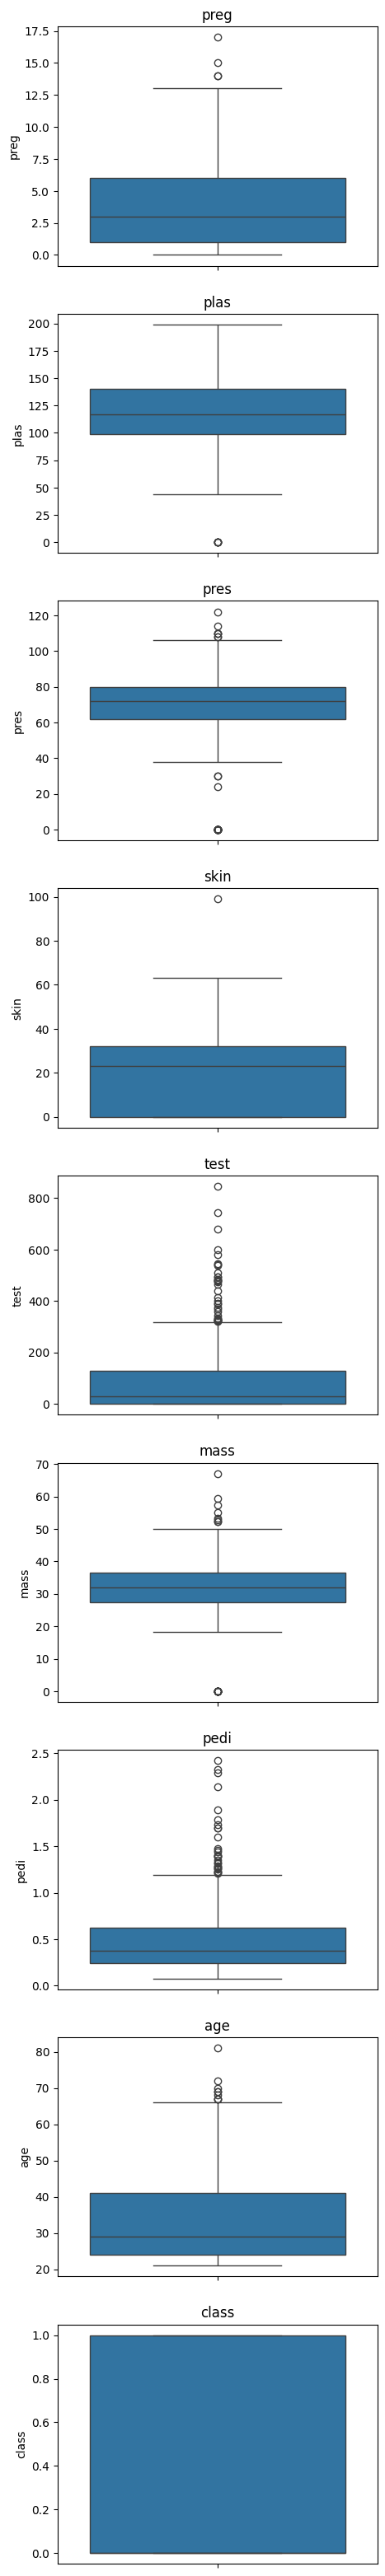

In [45]:
plt.figure(figsize=(5,40))
d = len(data.columns)
c = 1
for i in data.columns:
  plt.subplot(d,1,c)
  plt.title(i)
  sns.boxplot(data[i])
  c=c+1

<ipython-input-46-6d2eac6be43b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-46-6d2eac6be43b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i])
<ipython-input-46-6d2eac6be43b>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

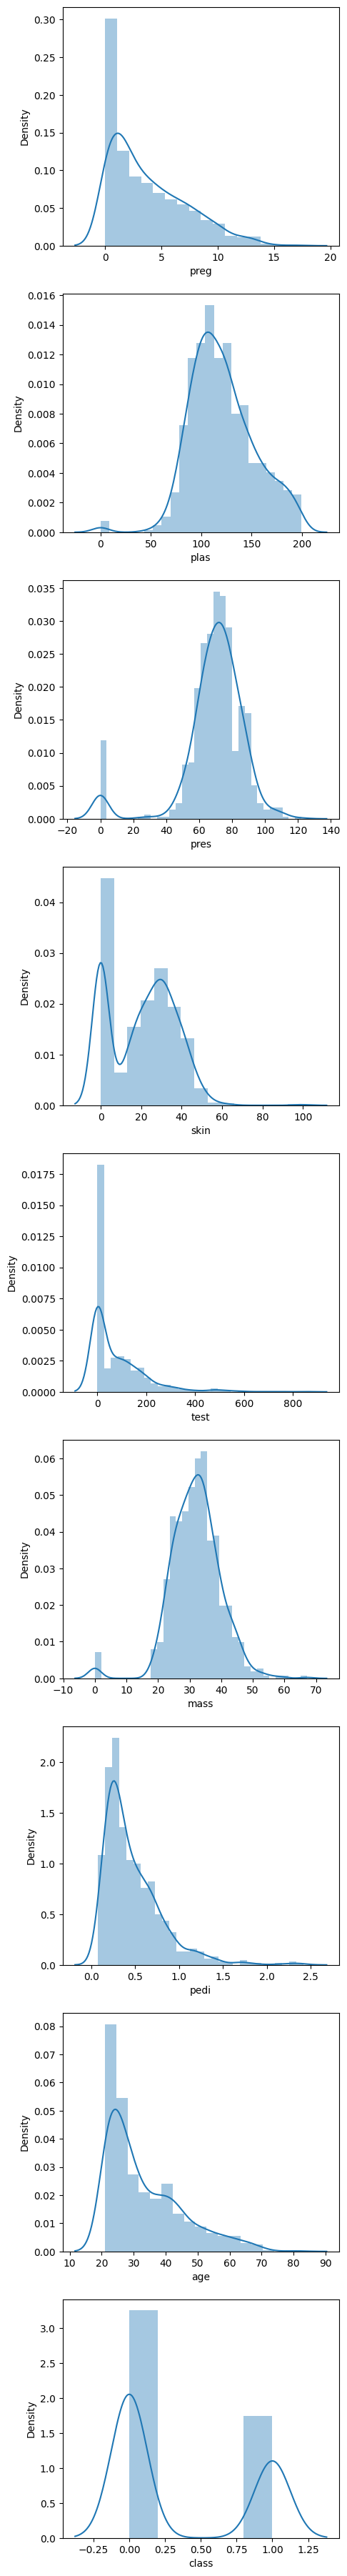

In [46]:
plt.figure(figsize=(5,46))
d = len(data.columns)
c = 1
for i in data.columns:
  plt.subplot(d,1,c)
  sns.distplot(data[i])
  c=c+1

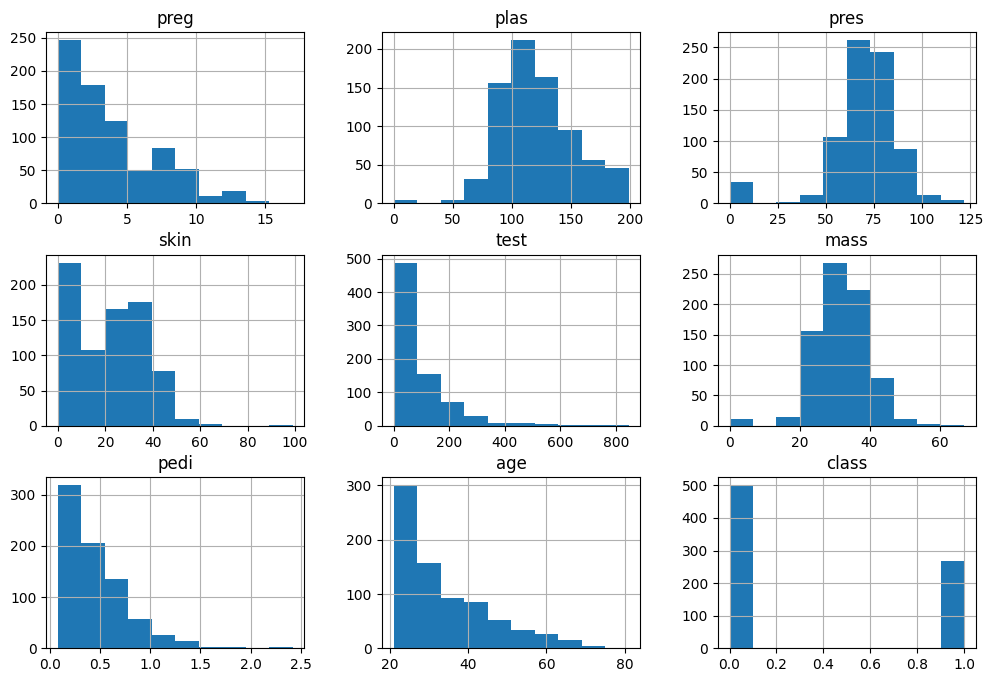

In [47]:
# Univariate Histograms
data.hist(figsize=(12, 8))
plt.show()

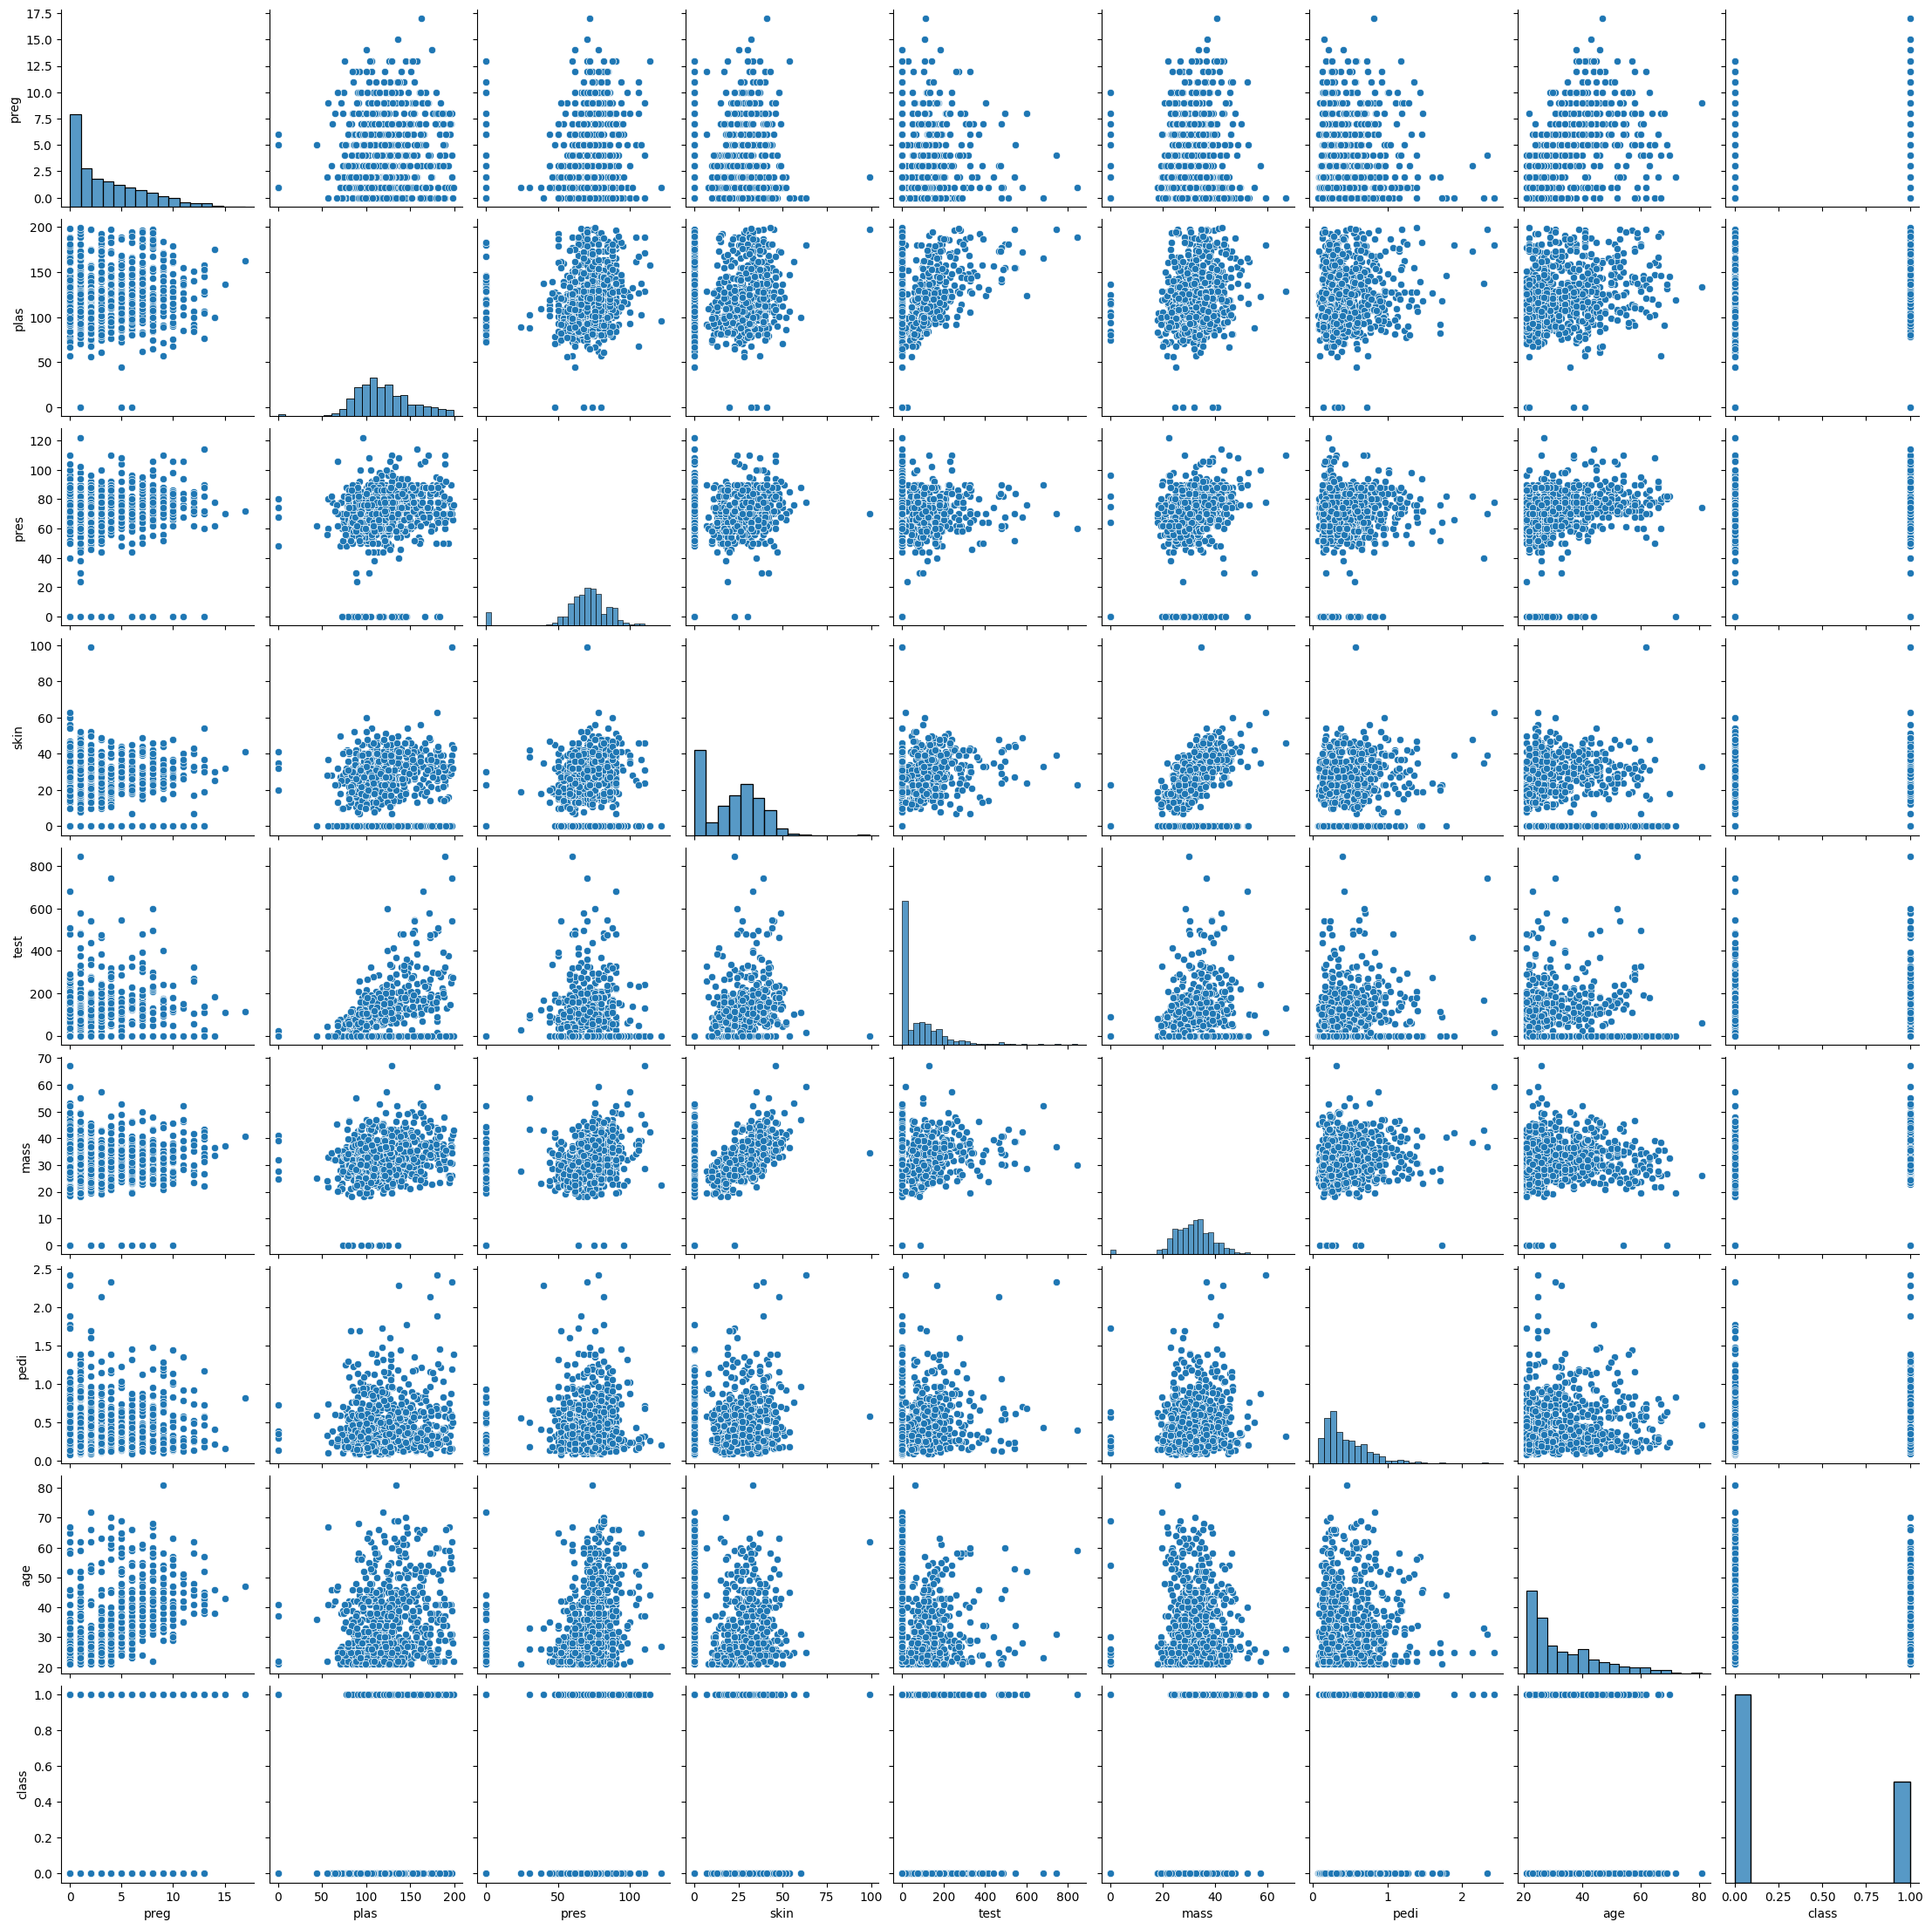

In [48]:
# Scatterplot Matrix
sns.pairplot(data)

# Scaling

In [49]:
# Normalization
# Rescale data (between x and y)
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


# independent and dependent
X = data.iloc[:,0:8]
Y = data.iloc[:,8]

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.35 0.74 0.59 0.35 0.   0.5  0.23 0.48]
 [0.06 0.43 0.54 0.29 0.   0.4  0.12 0.17]
 [0.47 0.92 0.52 0.   0.   0.35 0.25 0.18]
 [0.06 0.45 0.54 0.23 0.11 0.42 0.04 0.  ]
 [0.   0.69 0.33 0.35 0.2  0.64 0.94 0.2 ]]


In [50]:
# Standardize data
from sklearn.preprocessing import StandardScaler

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("/content/pima-indians-diabetes.data.csv", names=names)


# independent and dependent
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]


scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
print(rescaledX[0:5,:])

[[ 0.64  0.85  0.15  0.91 -0.69  0.2   0.47  1.43]
 [-0.84 -1.12 -0.16  0.53 -0.69 -0.68 -0.37 -0.19]
 [ 1.23  1.94 -0.26 -1.29 -0.69 -1.1   0.6  -0.11]
 [-0.84 -1.   -0.16  0.15  0.12 -0.49 -0.92 -1.04]
 [-1.14  0.5  -1.5   0.91  0.77  1.41  5.48 -0.02]]


# Feature Engineering

In [51]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("/content/pima-indians-diabetes.data.csv", names=names)

# independent and dependent
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

# feature extraction
model = LogisticRegression(max_iter=500)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

print(X.columns)
print(fit.support_,fit.ranking_)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[ True  True False False False  True  True False] [1 1 3 5 4 1 1 2]


In [52]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

# load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("/content/pima-indians-diabetes.data.csv", names=names)

# independent and dependent
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(X.columns)
print(model.feature_importances_)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.11 0.23 0.1  0.08 0.08 0.14 0.12 0.15]


# Model Validation and Model performance

In [53]:
#Lists to store model names and the model scores

m = []
s = []

In [54]:
# Evaluate using a train test split method on Logistic regression

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score #The F1 score can be interpreted as a weighted average of the precision and recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

#score
results = model.score(X_test, Y_test)
print(results)

#F1 score
matrix = f1_score(Y_test, predicted)
print(matrix)

#accuracy score
print(accuracy_score(Y_test, predicted))

#classification report
print(classification_report(Y_test, predicted))

m.append("Logistic Regression")
s.append(results)

0.7874015748031497
0.6666666666666666
0.7874015748031497
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       177
           1       0.64      0.70      0.67        77

    accuracy                           0.79       254
   macro avg       0.75      0.76      0.76       254
weighted avg       0.79      0.79      0.79       254



In [55]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10


kfold = KFold(n_splits=num_folds,random_state=3,shuffle=True)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100

77.73239917976761

# Model Building

In [56]:
from sklearn.tree import DecisionTreeClassifier

# independent and dependent
X = dataframe.iloc[:,0:8]
Y = dataframe.iloc[:,8]

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("DecisionTreeClassifier")
s.append(results.mean())

0.7044258373205742


In [57]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Naive Bayes")
s.append(results.mean())

0.7564935064935066


In [58]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

results = cross_val_score(model, X, Y, cv=10)

print(results.mean())

m.append("KNN")
s.append(results.mean())

0.7396274777853726


In [59]:
#support vector machine
from sklearn.svm import SVC

model = SVC()
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("SVM")
s.append(results.mean())


0.7578605604921396


In [60]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Adaboost")
s.append(results.mean())

0.7500512645249489


In [61]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier

cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=100)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Bagging classifier")
s.append(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.7590909090909091


In [62]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, max_features=3)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

m.append("Random Forest")
s.append(results.mean())


0.7669002050580999


In [63]:
# Voting Ensemble for Classification (logistic, SVM, DT)

from sklearn.ensemble import VotingClassifier

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=10)
print(results.mean())


m.append("Voting Classifier")
s.append(results.mean())

0.7670198222829803


In [64]:
models = {
    "Model":m,
    "Scores":s
}

In [65]:
#Comparing all models
models_df = pd.DataFrame(models)
models_df

,Model,Scores
0,Logistic Regression,0.787402
1,DecisionTreeClassifier,0.704426
2,Naive Bayes,0.756494
3,KNN,0.739627
4,SVM,0.757861
5,Adaboost,0.750051
6,Bagging classifier,0.759091
7,Random Forest,0.766900
8,Voting Classifier,0.767020


<Axes: xlabel='Scores', ylabel='Model'>

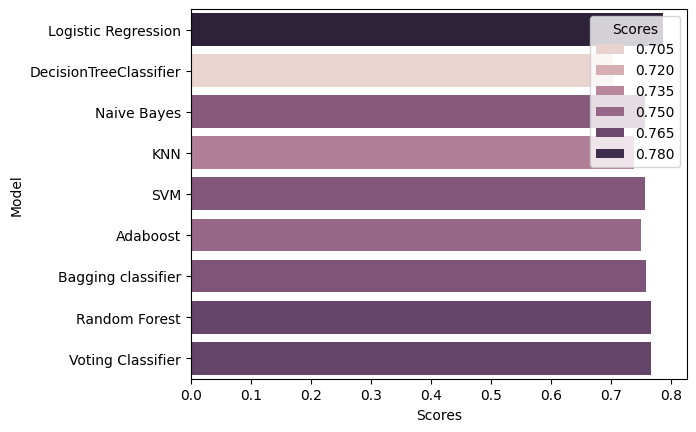

In [66]:
sns.barplot(x= "Scores",y="Model",data=models_df,orient="h",hue="Scores")

# ML Pipelines

In [67]:
from sklearn.pipeline import Pipeline

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.7721804511278195


In [68]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# create feature set
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


In [69]:
# Save Model Using Pickle and load and predict
import pickle
from pickle import dump
from pickle import load

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=5)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)

#save the model to disk
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

# some time later...

# load the model from disk
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497
